In [1]:
import torch
import os
from PIL import Image
import resnet_encoder
import utilis
import random
import pandas as pd
from utilis import vocab_info
from IPython.display import display

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

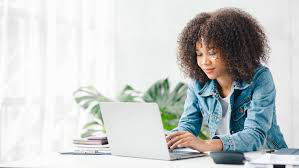

Generated caption:
a girl in a blue dress is sitting on a wooden bench .


In [9]:
images = os.listdir("test_images")
image_loc = "test_images/" + images[2]
image = Image.open(image_loc)
display(image)

print("Generated caption:")

encoded = resnet_encoder.single_image_feature(image_loc, device).to(device)
encoded = encoded.permute(0, 2, 3, 1)
encoded = encoded.view(encoded.size(0), -1, encoded.size(-1))

model = torch.load("./BestModel", weights_only=False)

input_sequence = [vocab_info.pad_token]*vocab_info.max_seq_length
input_sequence[0] = vocab_info.start_token

input_sequence = torch.tensor(input_sequence).unsqueeze(0).long().to(device)
predicted_sequence = []

with torch.no_grad():
    for eval_iter in range(vocab_info.max_seq_length):
        output, padding_mask = model(encoded, input_sequence)
        output = output[eval_iter, 0, :]
        
        values = torch.topk(output, k=1).values.tolist()
        indices = torch.topk(output, k=1).indices.tolist()

        next_word_idx = random.choice(indices)

        next_word = pd.read_pickle("utilis/index_to_word.pkl")[next_word_idx]

        input_sequence[:, eval_iter+1] = next_word_idx

        if next_word == "<end>": break

        predicted_sequence.append(next_word)
print(" ".join(predicted_sequence))


